<a href="https://colab.research.google.com/github/ms224141/projects/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.quantile()

,0.5
Pregnancies,3.0000
Glucose,117.0000
BloodPressure,72.0000
SkinThickness,23.0000
Insulin,30.5000
BMI,32.0000
DiabetesPedigreeFunction,0.3725
Age,29.0000
Outcome,0.0000


<Axes: >

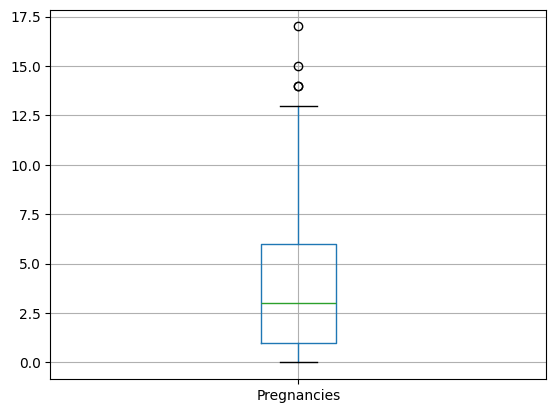

In [9]:
df.boxplot("Pregnancies")


In [10]:
df["Pregnancies"].describe()

,Pregnancies
count,768.000000
mean,3.845052
std,3.369578
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


<Axes: >

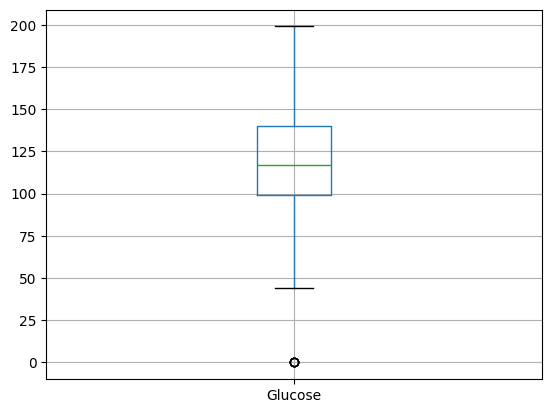

In [11]:
df.boxplot("Glucose")

<Axes: >

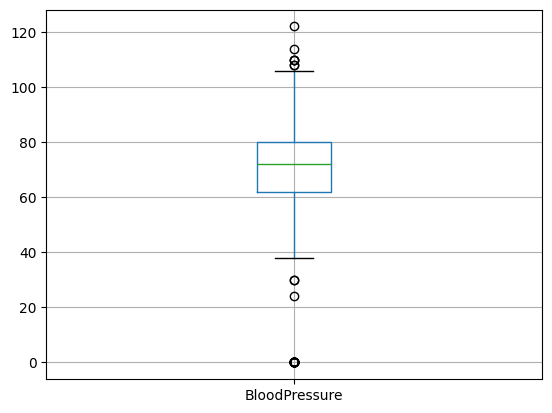

In [12]:
df.boxplot("BloodPressure")


In [13]:
df['BloodPressure'].describe()

,BloodPressure
count,768.000000
mean,69.105469
std,19.355807
min,0.000000
25%,62.000000
50%,72.000000
75%,80.000000
max,122.000000


<Axes: >

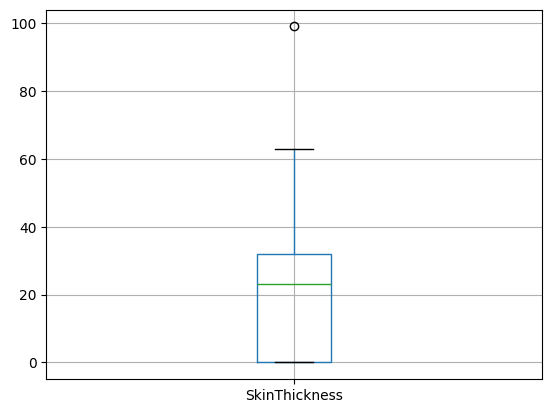

In [14]:
df.boxplot("SkinThickness")

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
x = df[["Pregnancies", "Glucose", "Insulin", "BMI", "Age"]] # Changed "glucose" to "Glucose" and "insulin" to "Insulin"

In [17]:
y=df["Outcome"]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)


In [19]:
from sklearn.svm import SVC

In [20]:
model=SVC()

In [21]:
model.fit(x_train,y_train)

SVC()

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.765625

In [30]:
#  doing hyper parameter tuning
param={

    "C":[1,5,10,20]
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [27]:
model2=GridSearchCV(estimator=SVC(),param_grid=param,scoring="accuracy",cv=5)

In [ ]:
model2.fit(x_train,y_train)